In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#read fertilizer dataset
fertilizer = pd.read_csv('FertilizerData.csv')

#drop column
fertilizer.drop('Unnamed: 0', axis=1, inplace=True)
fertilizer.head()

,Crop,N,P,K,pH
0,rice,80,40,40,5.5
1,maize,80,40,20,5.5
2,chickpea,40,60,80,5.5
3,kidneybeans,20,60,20,5.5
4,pigeonpeas,20,60,20,5.5


In [27]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    22 non-null     object 
 1   N       22 non-null     int64  
 2   P       22 non-null     int64  
 3   K       22 non-null     int64  
 4   pH      22 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1008.0+ bytes


In [28]:
#dataset stats
fertilizer.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [29]:
#distribution of numerical columns

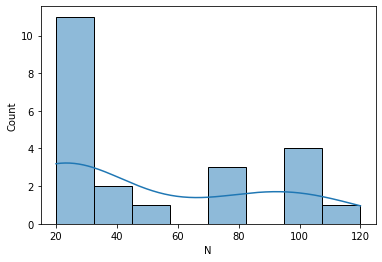

In [37]:
#nitrogen histplot
sns.histplot(data=fertilizer, x="N", kde=True, bins=8)

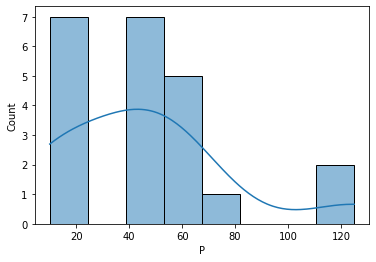

In [38]:
#nitrogen histplot
sns.histplot(data=fertilizer, x="P", kde=True, bins=8)

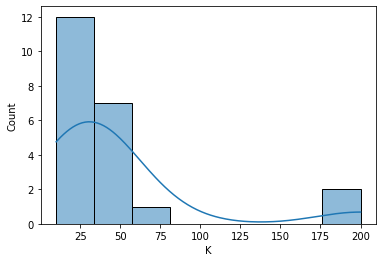

In [39]:
#nitrogen histplot
sns.histplot(data=fertilizer, x="K", kde=True, bins=8)

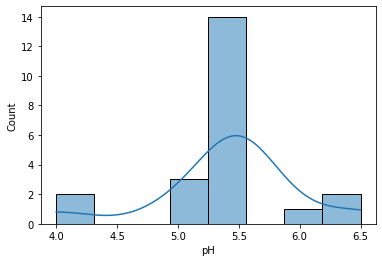

In [41]:
#nitrogen histplot
sns.histplot(data=fertilizer, x="pH", kde=True, bins=8)

In [42]:
#read crop dataset
crop_df = pd.read_csv('MergeFileCrop.csv')

#drop column
crop_df.drop('Unnamed: 0', axis=1, inplace=True)
crop_df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


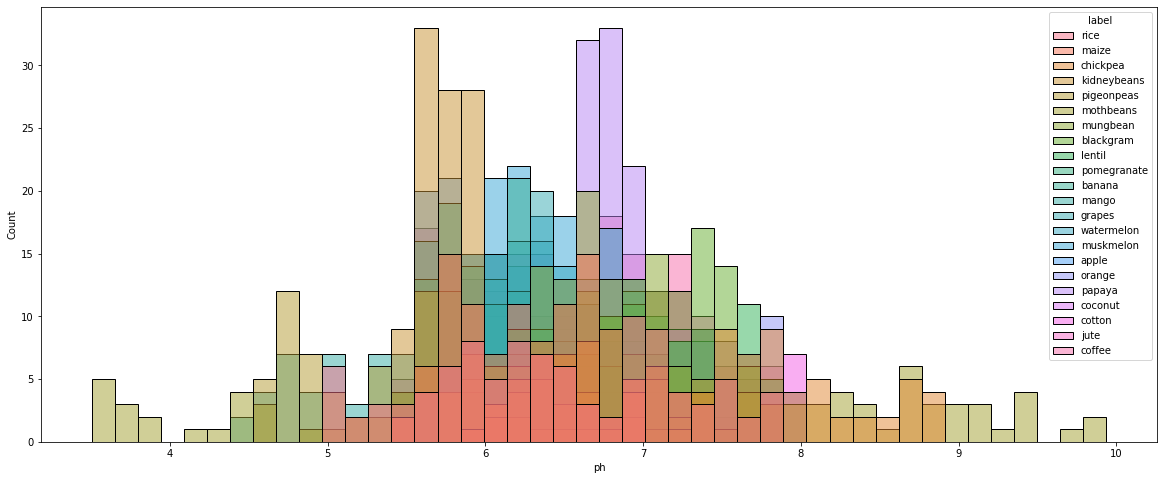

In [47]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
sns.histplot(data=crop_df, x="ph", hue="label")


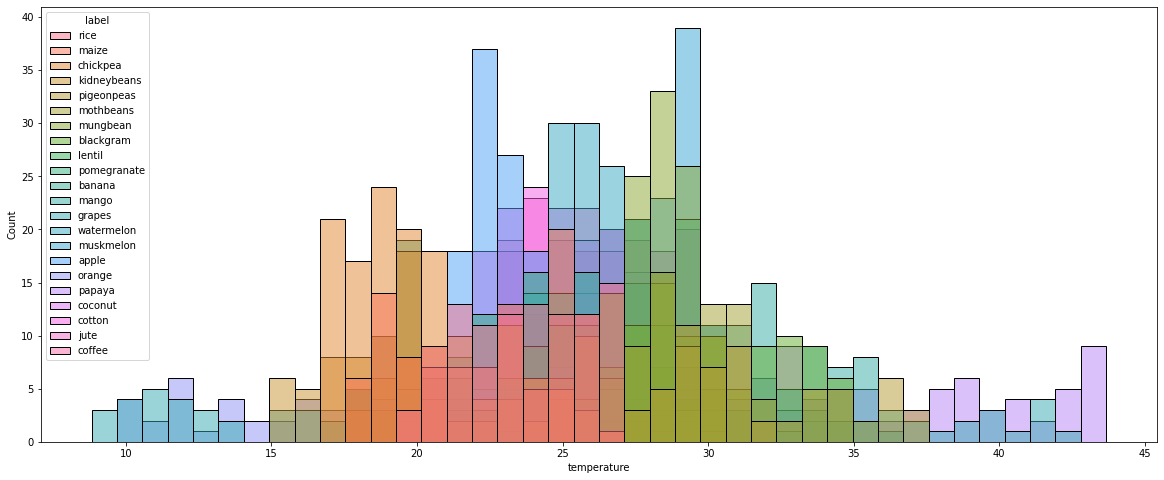

In [48]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))
sns.histplot(data=crop_df, x="temperature", hue="label")


In [43]:
#take average of temperature, humidity, ph and rainfall corresponding to that crop
new_crop_data = pd.DataFrame()

for crop in merge_fert['Crop'].to_list():
  temp = merge_crop[merge_crop['label'] == crop]['temperature'].mean()
  humid = merge_crop[merge_crop['label'] == crop]['humidity'].mean()
  ph = merge_crop[merge_crop['label'] == crop]['ph'].mean()
  rain = merge_crop[merge_crop['label'] == crop]['rainfall'].mean()

  new_crop_data = new_crop_data.append({'temperature':temp, 'humidity':humid, 'ph':ph, 
                                        'rainfall':rain, 'Crop':crop}, ignore_index=True)

In [44]:
new_crop_data.head()

,temperature,humidity,ph,rainfall,Crop
0,23.689332,82.272822,6.425471,236.181114,rice
1,22.389204,65.092249,6.245190,84.766988,maize
2,18.872847,16.860439,7.336957,80.058977,chickpea
3,20.115085,21.605357,5.749411,105.919778,kidneybeans
4,27.741762,48.061633,5.794175,149.457564,pigeonpeas


In [45]:
#merge  both dataset
fertilizer_recommendation = pd.merge(merge_fert, new_crop_data, on='Crop', how='inner')
fertilizer_recommendation.to_csv('fertilizer_recommendation.csv', index=False)